In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

yelp_data = pd.read_csv('analyzed_data.csv')

In [2]:
yelp_data.head()

,Alias,Name,Rating,Price,City,Zip_code,Address,Review,Review_Word_Count,No_Stop_Words:Tokens,No_Stop_Words:Sentence,Stop_Word_Count,Stop_Words_%,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Polarity,Positive_Word_Count,Positive_Words_%,Stemmed_Word_Count
0,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'The chocolate cups are amazing! Have been eat...,16,"['chocolate', 'cups', 'amazing', 'eating', 'ye...",chocolate cups amazing eating years always ta...,7,0.437500,chocolate cup amazing eating year always taste...,chocol cup amaz eat year alway tast fantast,"['chocol', 'cup', 'amaz', 'eat', 'year', 'alwa...",0.500000,2,0.222222,8
1,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Morris Park Bake Shop has become my go to spo...,49,"['morris', 'park', 'bake', 'shop', 'become', '...",morris park bake shop become go spot atmosphe...,20,0.408163,morris park bake shop become go spot atmospher...,morri park bake shop becom go spot atmospher p...,"['morri', 'park', 'bake', 'shop', 'becom', 'go...",0.338889,6,0.206897,28
2,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I thought the cookies and biscotti were prett...,122,"['thought', 'cookies', 'biscotti', 'pretty', '...",thought cookies biscotti pretty good definite...,53,0.434426,thought cooky biscotti pretty good definitely ...,thought cooki biscotti pretti good definit tas...,"['thought', 'cooki', 'biscotti', 'pretti', 'go...",0.314583,9,0.130435,61
3,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'Guys.... so Im a big time biscotti connoisseu...,169,"['guys', 'im', 'big', 'time', 'biscotti', 'con...",guys im big time biscotti connoisseur always ...,74,0.437870,guy im big time biscotti connoisseur always hu...,guy im big time biscotti connoisseur alway hun...,"['guy', 'im', 'big', 'time', 'biscotti', 'conn...",0.227841,12,0.126316,91
4,morris-park-bake-shop-bronx,Morris Park Bake Shop,4.5,$$,Bronx,10462,1007 Morris Park Ave,'I had a craving for a special type of cake wi...,59,"['craving', 'special', 'type', 'cake', 'ice', ...",craving special type cake ice cream layer reg...,27,0.457627,craving special type cake ice cream layer regu...,crave special type cake ice cream layer regula...,"['crave', 'special', 'type', 'cake', 'ice', 'c...",0.314643,7,0.218750,30


## Categorization and Dummy Variables

#### categorizing based on textblob polarity levels

In [3]:
yelp_data_s = yelp_data[yelp_data['Polarity'] != 0]
yelp_data_s = yelp_data_s.reset_index()

In [4]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

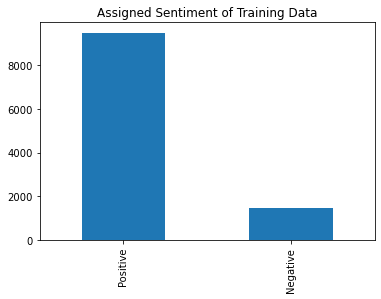

In [5]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [6]:
sentiment = []
for i in range(len(yelp_data_s)):
    if yelp_data_s['Polarity'][i] >= 0.4:
        sentiment.append('Positive')
    if yelp_data_s['Polarity'][i] > 0.2 and yelp_data_s['Polarity'][i] < 0.4:
        sentiment.append('Slightly Positive')
    if yelp_data_s['Polarity'][i] <= 0.2 and yelp_data_s['Polarity'][i] > 0:
        sentiment.append('Slightly Negative')
    if yelp_data_s['Polarity'][i] < 0:
        sentiment.append('Negative')
yelp_data_s['sentiment'] = sentiment

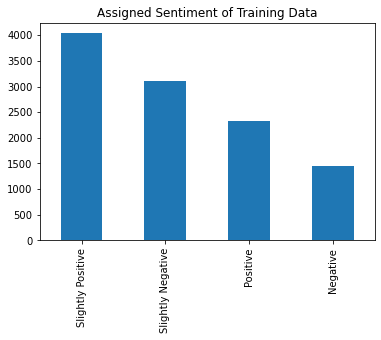

In [7]:
yelp_data_s['sentiment'].value_counts().plot(kind='bar')
plt.title('Assigned Sentiment of Training Data');

In [8]:
yelp_data_s = yelp_data_s.rename(columns={'Stop_Words_%':'Stop_Words_P'})
yelp_data_s = yelp_data_s.rename(columns={'Positive_Words_%':'Positive_Words_P'})

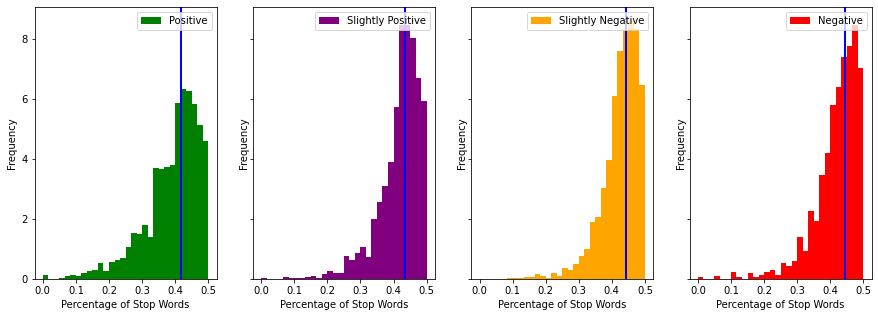

In [9]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stop_Words_P), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P, bins = 30, density = True, range = (0,0.5), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stop_Words_P), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Percentage of Stop Words', ylabel='Frequency')
plt.show()


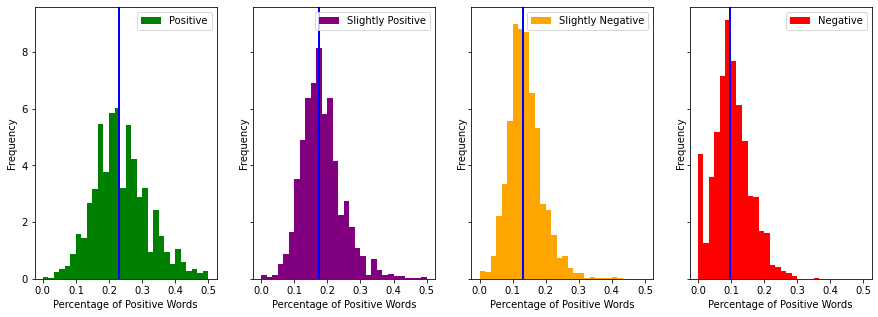

In [10]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P, bins = 30, density = True, range = (0,0.5), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Percentage of Positive Words', ylabel='Frequency')
plt.show()

In [11]:
print('Positive: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Positive_Words_P))
print('Slightly Positive: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Positive_Words_P))
print('Slightly Negative: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Positive_Words_P))
print('Negative: ',np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Positive_Words_P))

Positive:  0.2307692307692308
Slightly Positive:  0.17567567567567569
Slightly Negative:  0.1323529411764706
Negative:  0.0975609756097561


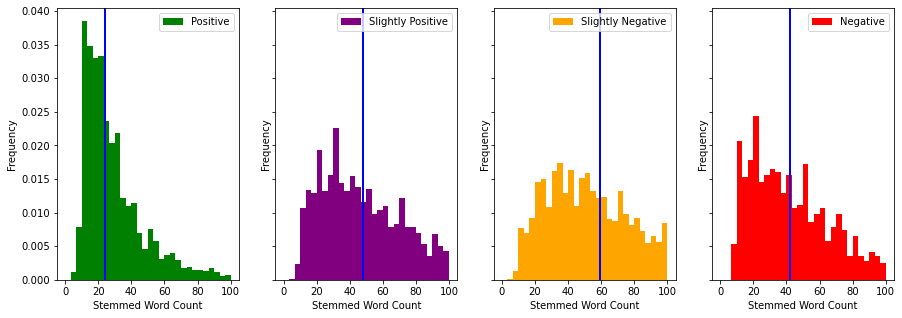

In [12]:
fig, axs = plt.subplots(1, 4, figsize = (15,5), sharex = True, sharey = True)
axs[0].hist(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'green', label = "Positive")
axs[0].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Positive'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[0].legend(loc="upper right")

axs[1].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'purple', label = "Slightly Positive")
axs[1].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Positive'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[1].legend(loc="upper right")

axs[2].hist(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'orange', label = "Slightly Negative")
axs[2].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Slightly Negative'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[2].legend(loc="upper right")

axs[3].hist(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stemmed_Word_Count, bins = 30, density = True, range = (0,100), color = 'red', label = "Negative")
axs[3].axvline(np.median(yelp_data_s[yelp_data_s.sentiment == 'Negative'].Stemmed_Word_Count), color = 'b', lw = 2, )
axs[3].legend(loc="upper right")

for ax in axs.flat:
    ax.set(xlabel='Stemmed Word Count', ylabel='Frequency')
plt.show()

## Count Vectorizer 

The CountVectorizer uses the bag of words approach to convert text to word counts and, more importantly, a vector. The vector for each word, paragraph, or sentence can then be compared to other vectors and we can see which ones are the most similar.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer()
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'chocolate': 7, 'cups': 9, 'amazing': 1, 'eating': 11, 'years': 30, 'always': 0, 'taste': 28, 'fantastic': 13, 'morris': 19, 'park': 21, 'bake': 5, 'shop': 25, 'become': 6, 'go': 14, 'spot': 26, 'atmosphere': 3, 'place': 22, 'great': 15, 'inviting': 17, 'love': 18, 'every': 12, 'thing': 29, 'ordered': 20, 'staff': 27, 'really': 24, 'pleasant': 23, 'definitely': 10, 'help': 16, 'anything': 2, 'come': 8, 'back': 4}

Shape of the Sparse Matrix  (2, 31)

[[1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 1 1 1 2 1 0 1 0 2 0 1 0 1 1 1 1 1 2 1 2 1 1 1 2 1 1 0 1 0]]


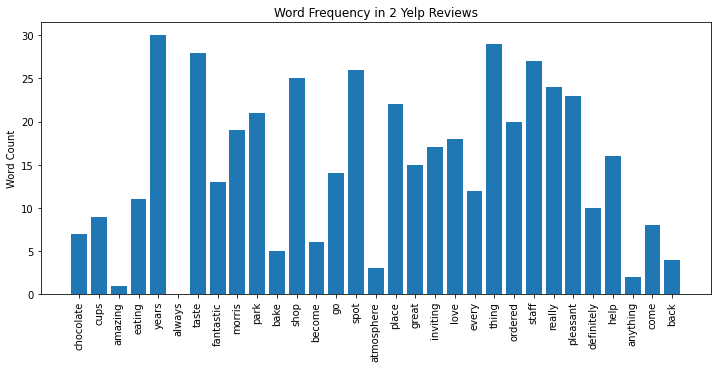

In [14]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews')
plt.ylabel('Word Count')
plt.show()

## TF-IDF

This stands for Term Frequency Inverse Document Frequency which means that in addition to measuring the word frequency in each review we can also measure how frequently a word appears among all lines of text. This is really important when it comes to picking out very unique words

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

#summary
print('List of unique Words: ',Tvectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',Tvector.shape)
print('')
print(Tvector.toarray())

List of unique Words:  {'chocolate': 7, 'cups': 9, 'amazing': 1, 'eating': 11, 'years': 30, 'always': 0, 'taste': 28, 'fantastic': 13, 'morris': 19, 'park': 21, 'bake': 5, 'shop': 25, 'become': 6, 'go': 14, 'spot': 26, 'atmosphere': 3, 'place': 22, 'great': 15, 'inviting': 17, 'love': 18, 'every': 12, 'thing': 29, 'ordered': 20, 'staff': 27, 'really': 24, 'pleasant': 23, 'definitely': 10, 'help': 16, 'anything': 2, 'come': 8, 'back': 4}

Shape of the Sparse Matrix  (2, 31)

[[0.35355339 0.35355339 0.         0.         0.         0.
  0.         0.35355339 0.         0.35355339 0.         0.35355339
  0.         0.35355339 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.35355339 0.
  0.35355339]
 [0.         0.         0.16222142 0.16222142 0.16222142 0.32444284
  0.16222142 0.         0.16222142 0.         0.32444284 0.
  0.16222142 0.         0.16222142 0.16222142 0.16222142 0.16222142
  0

## Bi-gram and min/max df

Phrases like 'No good' or 'not bad' are very common but if you tokenize them into individual words it completely changes the meaning. Bigrams turn these tokens into token pairs and create more unique pairs with more meaning

In [16]:
text = yelp_data_s['No_Stop_Words:Sentence'][0:2]
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'chocolate': 14, 'cups': 18, 'amazing': 2, 'eating': 23, 'years': 60, 'always': 0, 'taste': 56, 'fantastic': 27, 'chocolate cups': 15, 'cups amazing': 19, 'amazing eating': 3, 'eating years': 24, 'years always': 61, 'always taste': 1, 'taste fantastic': 57, 'morris': 38, 'park': 42, 'bake': 10, 'shop': 50, 'become': 12, 'go': 28, 'spot': 52, 'atmosphere': 6, 'place': 44, 'great': 30, 'inviting': 34, 'love': 36, 'every': 25, 'thing': 58, 'ordered': 40, 'staff': 54, 'really': 48, 'pleasant': 46, 'definitely': 20, 'help': 32, 'anything': 4, 'come': 16, 'back': 8, 'morris park': 39, 'park bake': 43, 'bake shop': 11, 'shop become': 51, 'become go': 13, 'go spot': 29, 'spot atmosphere': 53, 'atmosphere place': 7, 'place great': 45, 'great inviting': 31, 'inviting love': 35, 'love every': 37, 'every thing': 26, 'thing ordered': 59, 'ordered staff': 41, 'staff really': 55, 'really pleasant': 49, 'pleasant definitely': 47, 'definitely help': 22, 'help anything': 33, 'any

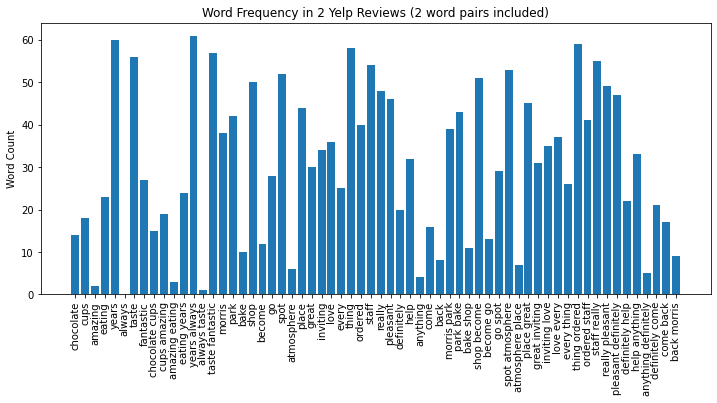

In [17]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 2 Yelp Reviews (2 word pairs included)')
plt.ylabel('Word Count')
plt.show()

In [18]:
text = yelp_data_s['No_Stop_Words:Sentence'][0:3]
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=2)
vectorizer.fit(text)
vector = vectorizer.transform(text)

#summary
print('List of unique Words: ',vectorizer.vocabulary_)
print('')
print('Shape of the Sparse Matrix ',vector.shape)
print('')
print(vector.toarray())

List of unique Words:  {'shop': 5, 'go': 2, 'great': 3, 'staff': 6, 'really': 4, 'definitely': 1, 'back': 0}

Shape of the Sparse Matrix  (3, 7)

[[0 0 0 0 0 0 0]
 [1 2 1 1 1 2 1]
 [1 1 1 1 3 1 2]]


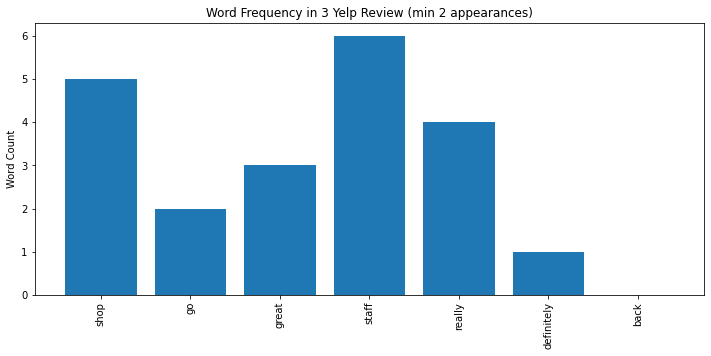

In [19]:
lists = vectorizer.vocabulary_.items() # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(12,5))
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.title('Word Frequency in 3 Yelp Review (min 2 appearances)')
plt.ylabel('Word Count')
plt.show()

## Creating a training Dataset

In [20]:
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer()
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

In [21]:
voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='Name'
col_name2 = 'Review'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_P'

col1 = yelp_data_s['Name']
col2 = yelp_data_s['Review']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']
col5 = yelp_data_s['Positive_Words_P']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)
df.insert(4,col_name5,col5)

In [22]:
morDf = df[df['Name'] == "Morris Park Bake Shop"]

In [23]:
print(morDf.iloc[15]['Polarity'])
print('Sentiment:', morDf.iloc[15]['Sentiment'])
x = morDf.iloc[15]['chocol':].sort_values(ascending=False)[:10]
x

0.425
Sentiment: Positive


nonsumm        0.476228
constraint     0.381509
renown         0.361524
bocc           0.343683
disappearin    0.295623
bustl          0.264306
uppromot       0.233091
aha            0.210109
expectthey     0.165831
mentaiko       0.164558
Name: 15, dtype: object

Accuracy Score:  0.6851400730816078

Overall Statistics : 

ACC Macro                                                         0.84257
F1 Macro                                                          0.68604
FPR Macro                                                         0.11532
Kappa                                                             0.55308
Overall ACC                                                       0.68514
PPV Macro                                                         0.72619
SOA1(Landis & Koch)                                               Moderate
TPR Macro                                                         0.66321
Zero-one Loss                                                     1034

Class Statistics :

Classes                                                           Negative              Positive              Slightly Negative     Slightly Positive     
ACC(Accuracy)                                                     0.93057               0.88459     

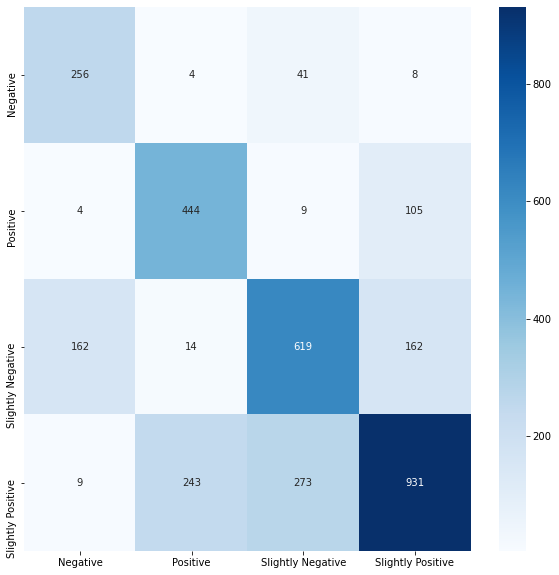

In [24]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from pycm import *

X = df.iloc[0:,4:]
y = df.Sentiment

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

clf2 = LogisticRegression(solver = 'lbfgs')
model = Pipeline([('classifier',clf2)])
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
mat = confusion_matrix(predictions,ytest)
cm_df =  pd.DataFrame(mat, index= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']],
                     columns= [i for i in ['Negative','Positive',
                                               'Slightly Negative',
                                              'Slightly Positive']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')

cm = ConfusionMatrix(actual_vector=list(ytest), predict_vector=list(predictions))
print('Accuracy Score: ',accuracy_score(predictions,ytest))
print('')
cm.stat(summary=True)

In [26]:
pip install pycm

Note: you may need to restart the kernel to use updated packages.Collecting art>=1.8



In [25]:
def mindf_test(numbers):
    scores = {}
    for num in numbers:
        text = yelp_data_s['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(min_df=num)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(),columns=voc)

        col_name1 ='Name'
        col_name2 = 'Review'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_P'

        col1 = yelp_data_s['Name']
        col2 = yelp_data_s['Review']
        col3 = yelp_data_s['Polarity']
        col4 = yelp_data_s['sentiment']
        col5 = yelp_data_s['Positive_Words_P']

        df.insert(0,col_name1,col1)
        df.insert(1,col_name2,col2)
        df.insert(2,col_name3,col3)
        df.insert(3,col_name4,col4)
        df.insert(4,col_name5,col5)
        
        X = df.iloc[0:,4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

        clf2 = LogisticRegression(solver = 'lbfgs')
        model = Pipeline([('classifier',clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        score = accuracy_score(predictions,ytest)
        
        scores[num] = score
    return scores

In [26]:
min_list1 = list(range(5,50))

In [31]:
scores_list1 = mindf_test(min_list1)

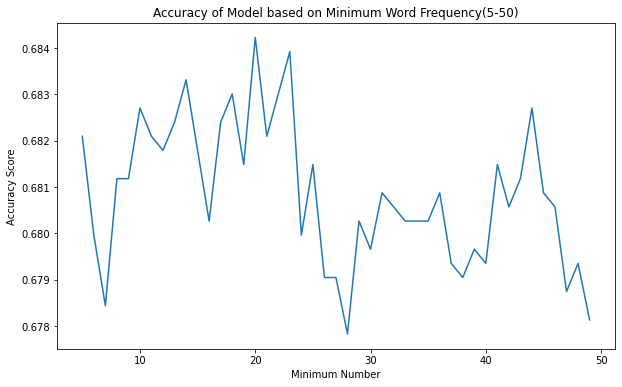

In [32]:
x = scores_list1.keys()
y = scores_list1.values()
plt.figure(figsize=(10,6))
plt.plot(list(x),list(y))
plt.title('Accuracy of Model based on Minimum Word Frequency(5-50)')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score');

In [33]:
min_list2 = list(range(40,100))
scores_list2 = mindf_test(min_list2)

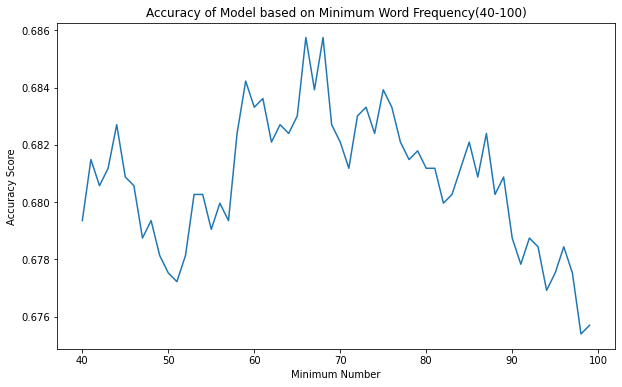

In [34]:
x = scores_list2.keys()
y = scores_list2.values()
plt.figure(figsize=(10,6))
plt.plot(list(x),list(y))
plt.title('Accuracy of Model based on Minimum Word Frequency(40-100)')
plt.xlabel('Minimum Number')
plt.ylabel('Accuracy Score');

In [35]:
import operator
max(scores_list2.items(), key=operator.itemgetter(1))[0]

66

In [36]:
def ngrams_test(numbers):
    scores = {}
    for num in numbers:
        text = yelp_data_s['Stemmed:Sentence']
        Tvectorizer = TfidfVectorizer(ngram_range=(1,num),min_df=52)
        Tvectorizer.fit(text)
        Tvector = Tvectorizer.transform(text)
        
        voc = Tvectorizer.vocabulary_
        df = pd.DataFrame(Tvector.toarray(),columns=voc)

        col_name1 ='Name'
        col_name2 = 'Review'
        col_name3 = 'Polarity'
        col_name4 = 'Sentiment'
        col_name5 = 'Positive_Words_P'

        col1 = yelp_data_s['Name']
        col2 = yelp_data_s['Review']
        col3 = yelp_data_s['Polarity']
        col4 = yelp_data_s['sentiment']
        col5 = yelp_data_s['Positive_Words_P']

        df.insert(0,col_name1,col1)
        df.insert(1,col_name2,col2)
        df.insert(2,col_name3,col3)
        df.insert(3,col_name4,col4)
        df.insert(4,col_name5,col5)
        
        X = df.iloc[0:,4:]
        y = df.Sentiment

        Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.3)

        clf2 = LogisticRegression(solver = 'lbfgs')
        model = Pipeline([('classifier',clf2)])
        model.fit(Xtrain, ytrain)
        predictions = model.predict(Xtest)
        
        score = accuracy_score(predictions,ytest)
        
        scores[num] = score
    return scores

In [37]:
ngram_list = [1,2,3,4]
ngram_scores = ngrams_test(ngram_list)

Text(0, 0.5, 'Accuracy Score')

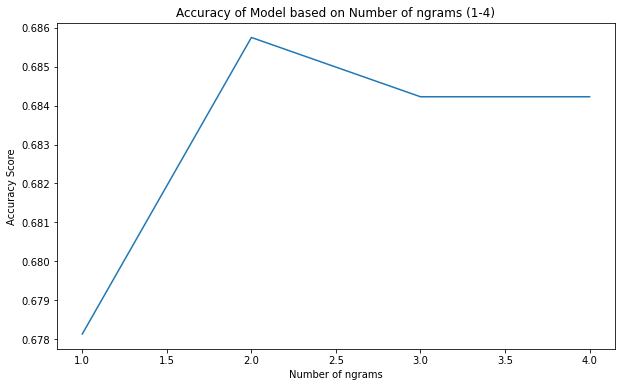

In [39]:
x = ngram_scores.keys()
y = ngram_scores.values()
plt.figure(figsize=(10,6))
plt.plot(list(x),list(y))
plt.title('Accuracy of Model based on Number of ngrams (1-4)')
plt.xlabel('Number of ngrams')
plt.ylabel('Accuracy Score')

In [40]:
text = yelp_data_s['Stemmed:Sentence']
Tvectorizer = TfidfVectorizer(min_df=52,ngram_range=(1,2))
Tvectorizer.fit(text)
Tvector = Tvectorizer.transform(text)

voc = Tvectorizer.vocabulary_
df = pd.DataFrame(Tvector.toarray(),columns=voc)

col_name1 ='Name'
col_name2 = 'Review'
col_name3 = 'Polarity'
col_name4 = 'Sentiment'
col_name5 = 'Positive_Words_P'

col1 = yelp_data_s['Name']
col2 = yelp_data_s['Review']
col3 = yelp_data_s['Polarity']
col4 = yelp_data_s['sentiment']
col5 = yelp_data_s['Positive_Words_P']

df.insert(0,col_name1,col1)
df.insert(1,col_name2,col2)
df.insert(2,col_name3,col3)
df.insert(3,col_name4,col4)
df.insert(4,col_name5,col5)